# 04_Suport Vector Machine 

Los algoritmos usados en Support vector machines (SVMs) son muy útiles y flexibles ya que pueden ser usados tanto para regresiones como clasificadores. En el siguiente ejemplo se intenta abordar como está estructurado y su uso para generar un clasificador.


As an example of support vector machines in action, let's take a look at the facial recognition problem. We will use the Labeled Faces in the Wild dataset, which consists of several thousand collated photos of various public figures. A fetcher for the dataset is built into Scikit-Learn:

Este ejemplo fue tomado del libro Python Data Science Handbook: 
https://github.com/jakevdp/PythonDataScienceHandbook

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

from sklearn.datasets.samples_generator import make_blobs

Vamos a tomar un grupo de datos donde las clases dependen del ajuste a una línea o curva. Tomamos una muestra de 50 puntos y delimitamos dos centroides basados en la distancia a los puntos. Y lo graficamos, este es un ejemplo muy básico de clasificador. 

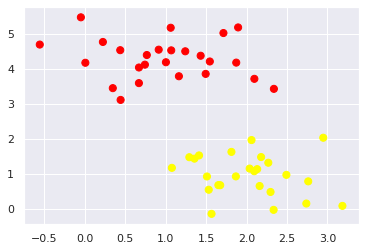

In [3]:
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

Como parte de un clasificador se dibuja una línea recta ajustada a la distribución de los datos. Para datos bidimensionales como los de este ejemplo, hay más de una posible línea divisoria que puede discriminar perfectamente entre las dos clases. Estos son tres separadores muy diferentes que, sin embargo, discriminan perfectamente entre estas muestras. 
Podemos dibujarlos de la siguiente manera:

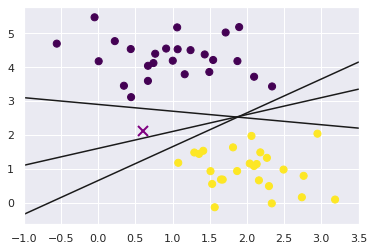

In [8]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plt.plot([0.6], [2.1], 'x', color='purple', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

Sin embargo, al momento de agregar puntos al clasificador identificamos que no es una tarea trivial ajustar las lineas entre clases. En la grafica anterior vemos una x que puede estran dentro de ambas clases. Las SVM Máquinas slucionan este tipo de problemas ya que en lugar de simplemente dibujar una línea de ancho cero entre las clases, podemos dibujar alrededor de cada línea un margen de cierta anchura, hasta el punto más cercano, Esto es el modelo optimo de ajuste.

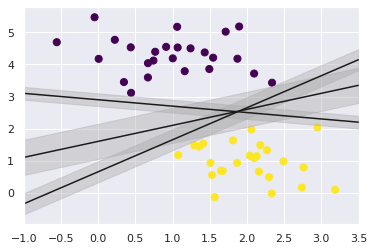

In [5]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);


Por lo que es necesario ajustar los datos y entrenar un modelo SVM en estos datos. Para ello usaremos un kernel lineal y estableceremos el parámetro C en un número muy grande.

In [9]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Ahora graficamos el modelo:

In [48]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

/home/kry/anaconda3/envs/class/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: No contour levels were found within the data range.


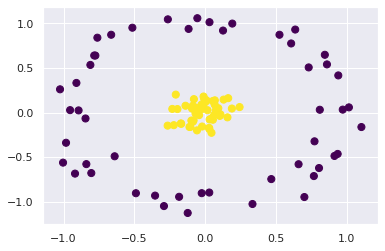

In [49]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plot_svc_decision_function(model);

En esta gráfica podemos encontrar una línea divisoria que maximiza el margen entre los dos conjuntos de puntos. Observe que algunos de los puntos de entrenamiento simplemente tocan el margen. Estos puntos son los elementos fundamentales de ajuste, se conocen como vectores de soporte y justo son los que les dan el nombre al algoritmo. En Scikit-Learn, la identidad de estos puntos se almacena en el atributo support_vectors_ del clasificador:

In [51]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

Del ejemplo anterior podemos explicar uno de los atributos más importates que debe tener un clasificador que es, que para el ajuste, solo importa la posición de los vectores de soporte; Los puntos más alejados del margen no modifican el ajuste y esto se debe a que estos puntos no contribuyen a la función de pérdida utilizada para ajustar el modelo, por lo que su posición y número no importan siempre que no crucen el margen.

Ahora verificamos lo anterios gráficamente con dos diferentes muestras 60 y 120. 

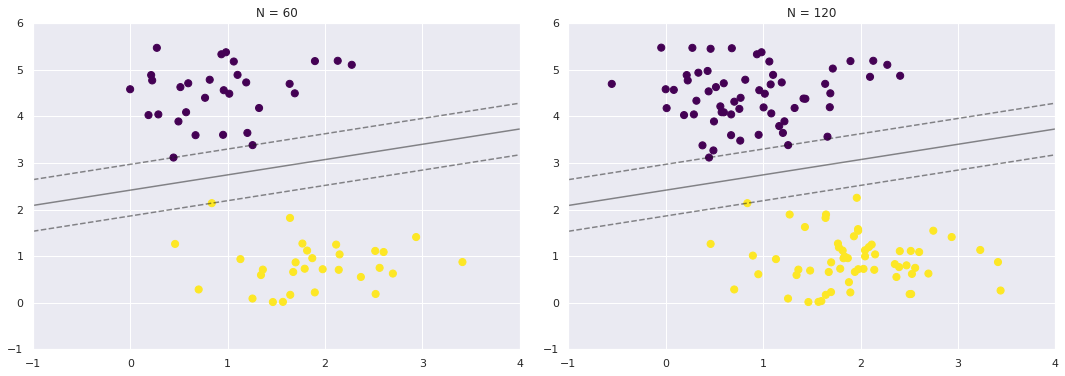

In [52]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

Ahora para jugar con los datos y la magnitud de la muestra vamos a graficar una N=10 vs N=200 par aentender la funciṕn de los vectores de soporte.

In [54]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200, 1000], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 200, 1000), value=10), Output()), _dom_classes=('…

Donde el SVM se vuelve extremadamente poderoso es cuando se combina con los kernels. Donde es posible proyectar nuestros datos en un espacio de dimensión superior definido por polinomios y funciones de base gaussiana, y ajustarlos a relaciones no lineales con un clasificador lineal. Ahora graficaremos esta idea: 

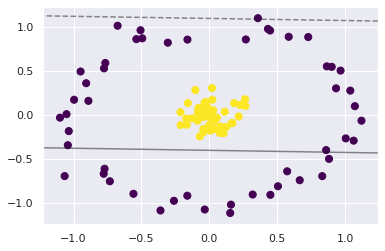

In [55]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plot_svc_decision_function(clf, plot_support=False);

Como podemos ver en la gráfica no es posible hacer una discriminación lineal para separar estos datos. Sin embargo, podemos proyectar los datos en una dimensión más alta de modo que un separador lineal sea suficiente. Por ejemplo, una simple proyección que podríamos usar sería calcular una función de base radial centrada en el grupo central:

In [56]:
r = np.exp(-(X ** 2).sum(1))

In [57]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='viridis')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[200, -200], azip=(-180, 180),
         X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', options=(200, -200), value=200), IntSlider(value=30, descri…

Podemos ver que con esta dimensión adicional, los datos se vuelven trivialmente linealmente separables, dibujando un plano de separación en, por ejemplo, r = 0.7.

Aquí tuvimos que elegir y ajustar nuestra proyección con cuidado: si no hubiéramos centrado nuestra función de base radial en la ubicación correcta, no habríamos visto resultados tan claros y linealmente separables. En general, la necesidad de tomar una decisión de este tipo es un problema: nos gustaría, de alguna manera, encontrar automáticamente las mejores funciones de base para usar.

Una estrategia para este fin es calcular una función de base centrada en cada punto del conjunto de datos y dejar que el algoritmo SVM analice los resultados. Este tipo de transformación de función de base se conoce como transformación de kernel, ya que se basa en una relación de similitud (o kernel) entre cada par de puntos.

Un problema potencial con esta estrategia, la proyección de N puntos en N dimensiones, es que podría volverse muy computacionalmente costoso a medida que N crece. Sin embargo, debido a un pequeño procedimiento conocido como el truco del kernel, se puede hacer un ajuste en los datos transformados por el kernel implícitamente, es decir, sin tener que construir la representación n-dimensional completa de la proyección del kernel. Este truco del núcleo está integrado en la SVM, y es una de las razones por las que el método es tan poderoso.

En Scikit-Learn, podemos aplicar SVM kernelized simplemente cambiando nuestro kernel lineal a un kernel RBF (función de base radial), utilizando el hiperparámetro del modelo de kernel:

In [46]:
clf = SVC(kernel='rbf', C=1E6, gamma= 'auto')
clf.fit(X, y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

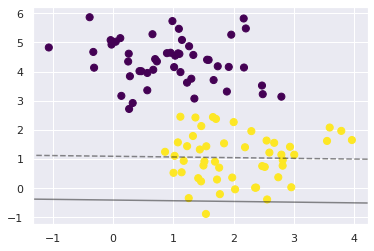

In [60]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

Al usar el kernel en el SVM, aprendemos un límite no lineal adecuado. Esta estrategia de transformación del kernel se usa a menudo en el aprendizaje automático para convertir los métodos lineales rápidos en métodos no lineales rápidos, especialmente en los modelos en los que se puede usar el truco del kernel. ¿Pero qué pasa si nuestros datos no estan perfectamente bien separados, como los que hemos venido utilizando? Cuando esto sucede la implementación del SVM tiene un factor_fudge que "suaviza" el margen y permite que algunos de los puntos se introduzcan en el margen para mejorar el ajuste. El factor C, nos dice que tan flexible es este margen.

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

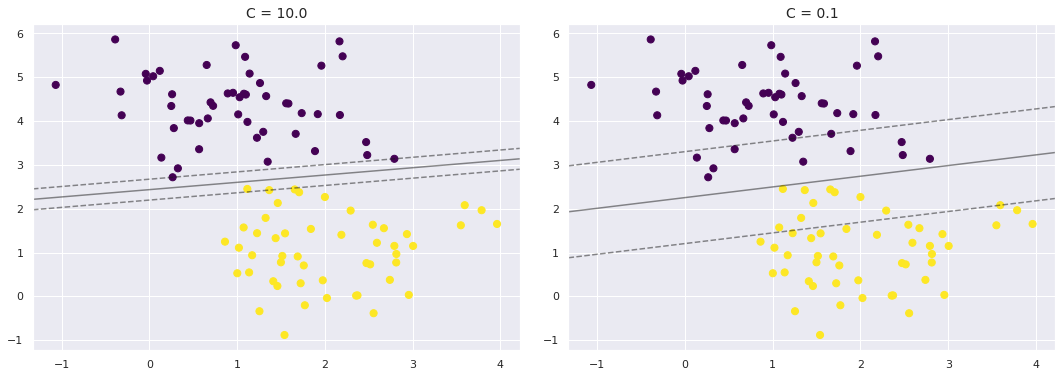

In [59]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

In [61]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


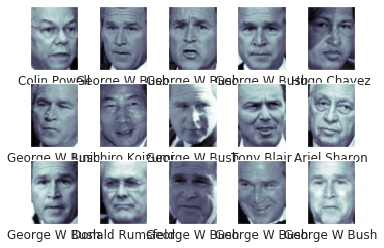

In [62]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [65]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [68]:
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [73]:
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

/home/kry/anaconda3/envs/class/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


CPU times: user 1min 20s, sys: 37.7 s, total: 1min 57s
Wall time: 37.7 s
{'svc__C': 10, 'svc__gamma': 0.001}


In [75]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

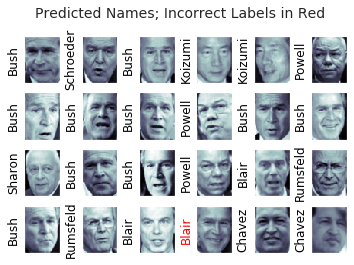

In [76]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);


In [79]:
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



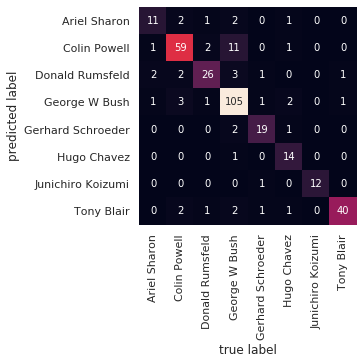

In [80]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');